In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/home/bobo/Documents/Datasets/Binance_ETHUSDT_1h .csv")
periods = [3, 5, 8, 12, 13, 21, 26, 34]
for period in periods:
    data[f'EMA{period}'] = data['Close'].ewm(span=period, adjust=False).mean()
data = data.iloc[:1000]
data.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USDT,tradecount,EMA3,EMA5,EMA8,EMA12,EMA13,EMA21,EMA26,EMA34
0,2023-10-19 23:00:00,ETHUSDT,1564.22,1567.31,1563.70,1566.57,3403.8235,5.327189e+06,12103,1566.570000,1566.570000,1566.570000,1566.570000,1566.570000,1566.570000,1566.570000,1566.570000
1,2023-10-19 22:00:00,ETHUSDT,1563.45,1568.00,1563.39,1564.22,4833.0579,7.566292e+06,12073,1565.395000,1565.786667,1566.047778,1566.208462,1566.234286,1566.356364,1566.395926,1566.435714
2,2023-10-19 21:00:00,ETHUSDT,1566.51,1567.72,1563.39,1563.46,5240.2983,8.200644e+06,15157,1564.427500,1565.011111,1565.472716,1565.785621,1565.837959,1566.093058,1566.178450,1566.265673
3,2023-10-19 20:00:00,ETHUSDT,1568.00,1573.15,1563.72,1566.51,8725.2965,1.369178e+07,19124,1565.468750,1565.510741,1565.703224,1565.897064,1565.933965,1566.130962,1566.203009,1566.279635
4,2023-10-19 19:00:00,ETHUSDT,1561.66,1569.92,1561.20,1568.00,6092.9619,9.540306e+06,16003,1566.734375,1566.340494,1566.213618,1566.220593,1566.229113,1566.300874,1566.336120,1566.377942


The MACD is calculated as the difference between a short-term EMA (e.g., EMA12) and a long-term EMA (e.g., EMA26). To find the most responsive pair:

    Evaluate how different pairs (short, long) capture trends or react to price changes.
    Statistical and visual methods can help quantify this responsiveness.

In [3]:
from itertools import combinations

In [4]:
# Store MACD correlations
macd_correlations = []
for short, long in combinations(periods, 2):
    data[f'MACD_{short}_{long}'] = data[f'EMA{short}'] - data[f'EMA{long}']
    corr = data[f'MACD_{short}_{long}'].corr(data['Close'].pct_change())
    macd_correlations.append((short, long, corr))

# Find the most responsive pair
most_responsive = max(macd_correlations, key=lambda x: abs(x[2]))
print(f"Most responsive MACD pair: EMA{most_responsive[0]} and EMA{most_responsive[1]} with correlation {most_responsive[2]:.2f}")

Most responsive MACD pair: EMA3 and EMA5 with correlation 0.45


In [5]:
data.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USDT,tradecount,EMA3,...,MACD_12_13,MACD_12_21,MACD_12_26,MACD_12_34,MACD_13_21,MACD_13_26,MACD_13_34,MACD_21_26,MACD_21_34,MACD_26_34
0,2023-10-19 23:00:00,ETHUSDT,1564.22,1567.31,1563.70,1566.57,3403.8235,5.327189e+06,12103,1566.570000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-10-19 22:00:00,ETHUSDT,1563.45,1568.00,1563.39,1564.22,4833.0579,7.566292e+06,12073,1565.395000,...,-0.025824,-0.147902,-0.187464,-0.227253,-0.122078,-0.161640,-0.201429,-0.039562,-0.079351,-0.039788
2,2023-10-19 21:00:00,ETHUSDT,1566.51,1567.72,1563.39,1563.46,5240.2983,8.200644e+06,15157,1564.427500,...,-0.052338,-0.307437,-0.392829,-0.480052,-0.255099,-0.340491,-0.427714,-0.085392,-0.172616,-0.087224
3,2023-10-19 20:00:00,ETHUSDT,1568.00,1573.15,1563.72,1566.51,8725.2965,1.369178e+07,19124,1565.468750,...,-0.036901,-0.233898,-0.305945,-0.382571,-0.196997,-0.269044,-0.345670,-0.072048,-0.148673,-0.076626
4,2023-10-19 19:00:00,ETHUSDT,1561.66,1569.92,1561.20,1568.00,6092.9619,9.540306e+06,16003,1566.734375,...,-0.008520,-0.080281,-0.115527,-0.157349,-0.071761,-0.107007,-0.148829,-0.035245,-0.077067,-0.041822


In [6]:
rolling_window = 5  # Adjust this to a smaller number for testing, e.g., 10
data[f'SNR_{short}_{long}'] = (
    data[f'MACD_{short}_{long}'].rolling(rolling_window).std() / 
    data[f'MACD_{short}_{long}'].diff().rolling(rolling_window).std()
)

In [7]:
data.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USDT,tradecount,EMA3,...,MACD_12_21,MACD_12_26,MACD_12_34,MACD_13_21,MACD_13_26,MACD_13_34,MACD_21_26,MACD_21_34,MACD_26_34,SNR_26_34
0,2023-10-19 23:00:00,ETHUSDT,1564.22,1567.31,1563.70,1566.57,3403.8235,5.327189e+06,12103,1566.570000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,2023-10-19 22:00:00,ETHUSDT,1563.45,1568.00,1563.39,1564.22,4833.0579,7.566292e+06,12073,1565.395000,...,-0.147902,-0.187464,-0.227253,-0.122078,-0.161640,-0.201429,-0.039562,-0.079351,-0.039788,NaN
2,2023-10-19 21:00:00,ETHUSDT,1566.51,1567.72,1563.39,1563.46,5240.2983,8.200644e+06,15157,1564.427500,...,-0.307437,-0.392829,-0.480052,-0.255099,-0.340491,-0.427714,-0.085392,-0.172616,-0.087224,NaN
3,2023-10-19 20:00:00,ETHUSDT,1568.00,1573.15,1563.72,1566.51,8725.2965,1.369178e+07,19124,1565.468750,...,-0.233898,-0.305945,-0.382571,-0.196997,-0.269044,-0.345670,-0.072048,-0.148673,-0.076626,NaN
4,2023-10-19 19:00:00,ETHUSDT,1561.66,1569.92,1561.20,1568.00,6092.9619,9.540306e+06,16003,1566.734375,...,-0.080281,-0.115527,-0.157349,-0.071761,-0.107007,-0.148829,-0.035245,-0.077067,-0.041822,NaN


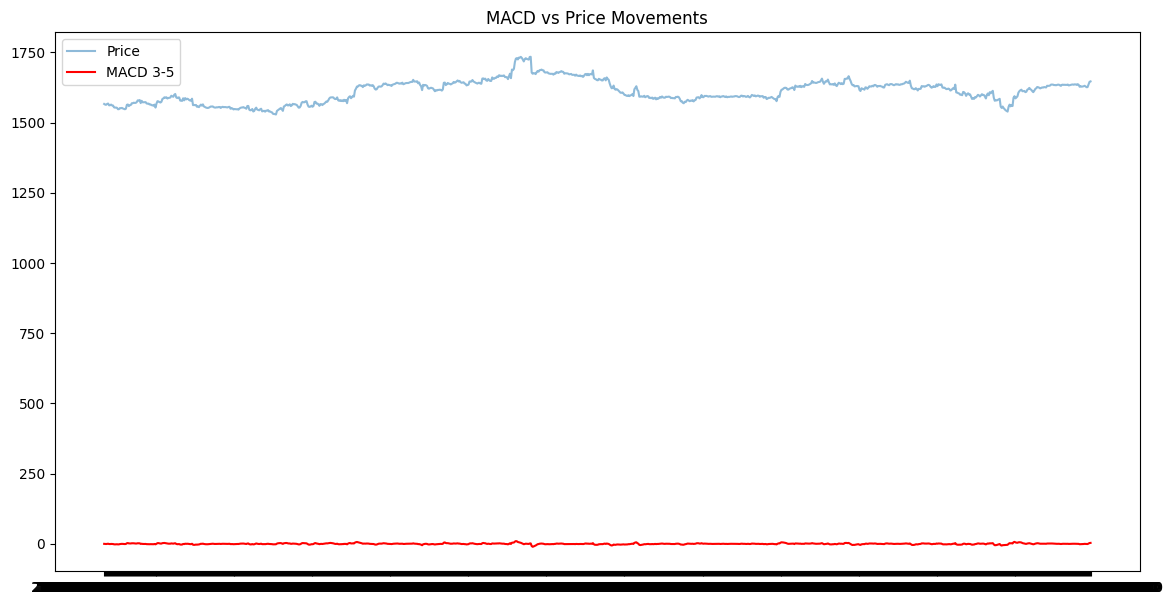

In [9]:
signal_period = 9
data[f'Signal_{short}_{long}'] = data[f'MACD_{short}_{long}'].ewm(span=signal_period, adjust=False).mean()

import matplotlib.pyplot as plt

short, long = most_responsive[0], most_responsive[1]

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Price', alpha=0.5)
plt.plot(data['Date'], data[f'MACD_{short}_{long}'], label=f'MACD {short}-{long}', color='red')
plt.legend()
plt.title('MACD vs Price Movements')
plt.show()

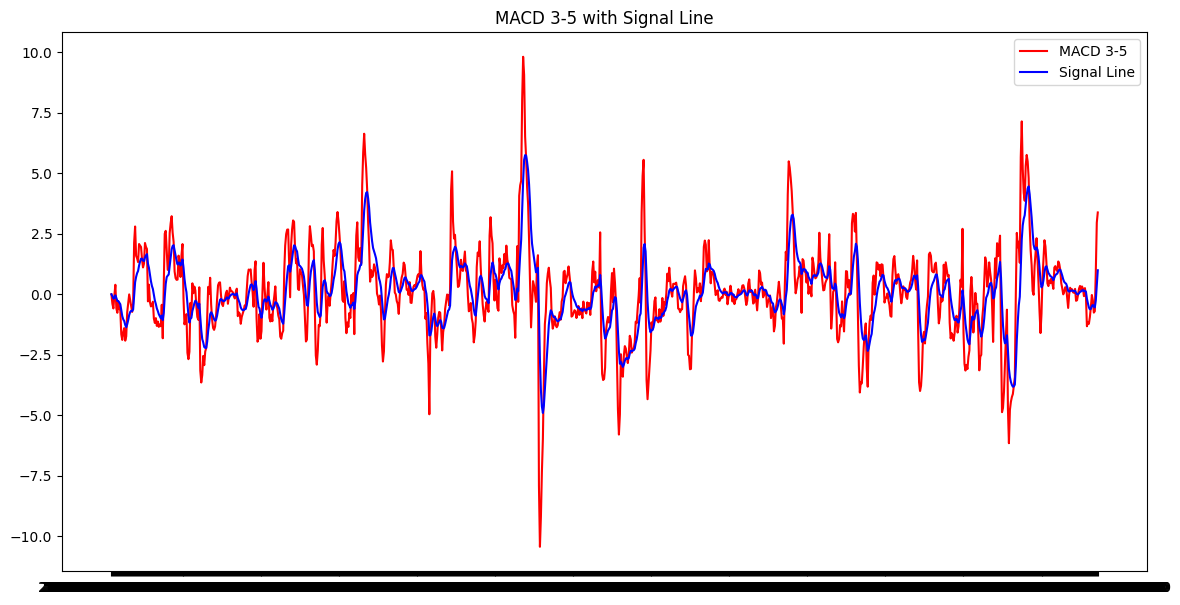

In [10]:
signal_period = 9
data[f'Signal_{short}_{long}'] = data[f'MACD_{short}_{long}'].ewm(span=signal_period, adjust=False).mean()

# Plot MACD and Signal Line
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data[f'MACD_{short}_{long}'], label=f'MACD {short}-{long}', color='red')
plt.plot(data['Date'], data[f'Signal_{short}_{long}'], label=f'Signal Line', color='blue')
plt.title(f'MACD {short}-{long} with Signal Line')
plt.legend()
plt.show()